Mengimpor berbagai pustaka yang diperlukan untuk analisis data, visualisasi, dan pemodelan, seperti pandas, numpy, seaborn, matplotlib, dan modul dari sklearn.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pickle

Membaca dataset Data_rumah.csv menggunakan pandas.

In [4]:
df_rumah = pd.read_csv("Data_rumah.csv")

Memeriksa nilai yang hilang dengan isnull().sum().

In [5]:
df_rumah.isnull().sum(axis=0)

NO            0
NAMA RUMAH    0
HARGA         0
LB            0
LT            0
KT            0
KM            0
GRS           0
dtype: int64

Menampilkan statistik deskriptif dari dataset dengan describe().

In [6]:
df_rumah.describe()

,NO,HARGA,LB,LT,KT,KM,GRS
count,1010.000000,1.010000e+03,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,505.500000,7.628987e+09,276.539604,237.432673,4.668317,3.607921,1.920792
std,291.706188,7.340946e+09,177.864557,179.957604,1.572776,1.420066,1.510998
min,1.000000,4.300000e+08,40.000000,25.000000,2.000000,1.000000,0.000000
25%,253.250000,3.262500e+09,150.000000,130.000000,4.000000,3.000000,1.000000
50%,505.500000,5.000000e+09,216.500000,165.000000,4.000000,3.000000,2.000000
75%,757.750000,9.000000e+09,350.000000,290.000000,5.000000,4.000000,2.000000
max,1010.000000,6.500000e+10,1126.000000,1400.000000,10.000000,10.000000,10.000000


Menampilkan informasi dataset dengan info()

In [7]:
print("Dataset Info:")
print(df_rumah.info())
print("\nMissing Values:")
print(df_rumah.isnull().sum())
print("\nDescriptive Statistics:")
print(df_rumah.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NO          1010 non-null   int64 
 1   NAMA RUMAH  1010 non-null   object
 2   HARGA       1010 non-null   int64 
 3   LB          1010 non-null   int64 
 4   LT          1010 non-null   int64 
 5   KT          1010 non-null   int64 
 6   KM          1010 non-null   int64 
 7   GRS         1010 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.3+ KB
None

Missing Values:
NO            0
NAMA RUMAH    0
HARGA         0
LB            0
LT            0
KT            0
KM            0
GRS           0
dtype: int64

Descriptive Statistics:
                NO         HARGA           LB           LT           KT  \
count  1010.000000  1.010000e+03  1010.000000  1010.000000  1010.000000   
mean    505.500000  7.628987e+09   276.539604   237.432673     4.668317   
std     291.7061

Membuat visualisasi distribusi harga rumah dan hubungan antara luas bangunan (LB), luas tanah (LT) dengan harga menggunakan matplotlib dan seaborn.

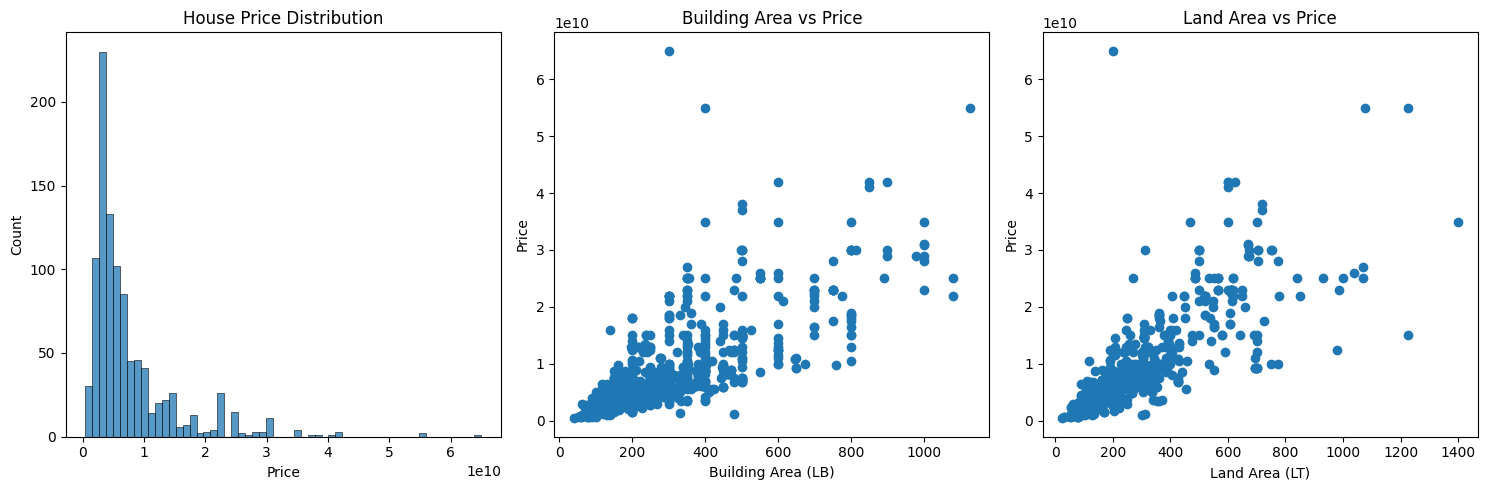

In [8]:
plt.figure(figsize=(15, 5))

# Price Distribution
plt.subplot(1, 3, 1)
plt.title('House Price Distribution')
sns.histplot(df_rumah['HARGA'])
plt.xlabel('Price')

# Building Area vs Price
plt.subplot(1, 3, 2)
plt.scatter(df_rumah['LB'], df_rumah['HARGA'])
plt.xlabel('Building Area (LB)')
plt.ylabel('Price')
plt.title('Building Area vs Price')

# Land Area vs Price
plt.subplot(1, 3, 3)
plt.scatter(df_rumah['LT'], df_rumah['HARGA'])
plt.xlabel('Land Area (LT)')
plt.ylabel('Price')
plt.title('Land Area vs Price')

plt.tight_layout()
plt.show()

In [9]:
X = df_rumah[['LB', 'LT', 'KT', 'KM', 'GRS']]

Mengambil log dari harga rumah untuk target y untuk menstabilkan varians.

In [10]:
y = np.log(df_rumah['HARGA'])

Menggunakan StandardScaler untuk menstandarkan fitur X.

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Menggunakan StandardScaler untuk menstandarkan fitur X.

In [12]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

Melatih model LinearRegression dengan data pelatihan.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [14]:
model_regresi = LinearRegression()
model_regresi.fit(X_train, y_train)

LinearRegression()

Menggunakan cross_val_score untuk mengevaluasi model dengan validasi silang dan menghitung skor R-squared.

In [15]:
cv_scores = cross_val_score(model_regresi, X_train, y_train, cv=5, scoring='r2')


In [16]:
y_pred = model_regresi.predict(X_test)

Memprediksi data uji dan menghitung metrik evaluasi seperti Mean Squared Error (MSE), Root Mean Squared Error (RMSE), dan Mean Absolute Error (MAE).

In [17]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Cross-validated R-squared scores: {cv_scores}")
print(f"Mean R-squared score (CV): {np.mean(cv_scores):.4f}")


Model Evaluation Metrics:
Cross-validated R-squared scores: [0.78438161 0.68367872 0.77251896 0.81118256 0.77743693]
Mean R-squared score (CV): 0.7658


Menghitung R-squared pada data uji.

In [18]:
r_squared = model_regresi.score(X_test, y_test)
print(f"Test R-squared score: {r_squared:.4f}")
print(f"Mean Absolute Error (MAE): Rp {np.exp(mae):,.2f}")
print(f"Root Mean Squared Error (RMSE): Rp {np.exp(rmse):,.2f}")

Test R-squared score: 0.8278
Mean Absolute Error (MAE): Rp 1.25
Root Mean Squared Error (RMSE): Rp 1.35


Menghitung kesalahan persentase rata-rata antara prediksi dan nilai sebenarnya.

In [19]:
y_pred_original = np.exp(y_pred)
y_test_original = np.exp(y_test)
percentage_errors = np.abs((y_pred_original - y_test_original) / y_test_original * 100)
mean_percentage_error = np.mean(percentage_errors)

print(f"Mean Percentage Error: {mean_percentage_error:.2f}%")

Mean Percentage Error: 23.98%


Menyimpan model, scaler, dan fitur polinomial ke dalam file menggunakan pickle.

In [20]:
model_data = {
    'model': model_regresi,
    'scaler': scaler,
    'poly': poly
}

filename = 'model_prediksi_harga_rumah.sav'
pickle.dump(model_data, open(filename, 'wb'))

Mendefinisikan fungsi predict_house_price untuk memprediksi harga rumah berdasarkan input fitur.

In [21]:
def predict_house_price(lb, lt, kt, km, grs):
    # Prepare input
    X_input = np.array([[lb, lt, kt, km, grs]])
    
    # Scale input
    X_input_scaled = scaler.transform(X_input)
    
    # Transform to polynomial features
    X_input_poly = poly.transform(X_input_scaled)
    
    # Predict (and transform back from log scale)
    prediction = np.exp(model_regresi.predict(X_input_poly)[0])
    return prediction

In [22]:
test_house = [220, 220, 3, 3, 0]
predicted_price = predict_house_price(*test_house)
print(f"\nExample Prediction:")
print(f"House features (LB, LT, KT, KM, GRS): {test_house}")
print(f"Predicted price: Rp {predicted_price:,.2f}")


Example Prediction:
House features (LB, LT, KT, KM, GRS): [220, 220, 3, 3, 0]
Predicted price: Rp 4,741,966,005.78


c:\Users\MP-Tech\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Mencari rumah serupa dalam dataset berdasarkan kriteria tertentu dan menampilkan rata-rata harga rumah serupa.

In [23]:
similar_houses = df_rumah[
    (df_rumah['LB'].between(test_house[0]-50, test_house[0]+50)) &
    (df_rumah['LT'].between(test_house[1]-50, test_house[1]+50)) &
    (df_rumah['KT'] == test_house[2]) &
    (df_rumah['KM'] == test_house[3])
]

if not similar_houses.empty:
    print("\nSimilar houses in dataset:")
    print(similar_houses[['LB', 'LT', 'KT', 'KM', 'GRS', 'HARGA']])
    print(f"\nAverage price of similar houses: Rp {similar_houses['HARGA'].mean():,.2f}")


Similar houses in dataset:
      LB   LT  KT  KM  GRS       HARGA
0    220  220   3   3    0  3800000000
62   245  240   3   3    2  8100000000
136  220  200   3   3    2  5950000000
342  220  217   3   3    1  5000000000
506  194  194   3   3    1  4000000000
700  250  217   3   3    1  5000000000

Average price of similar houses: Rp 5,308,333,333.33
